In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale 
from sklearn.metrics.pairwise import euclidean_distances

path = '/Users/nicolelubaczewska/Downloads/netflix.csv'
nf = pd.read_csv(path)

In [2]:
nf

,time,year,quarter,revenue,income
0,1,2001,1,17057,9713.363
1,2,2001,2,18359,9688.375
2,3,2001,3,18878,9899.718
3,4,2001,4,21618,9735.328
4,5,2002,1,30527,9963.910
5,6,2002,2,36360,10044.570
6,7,2002,3,40731,10059.497
7,8,2002,4,45188,10123.367
8,9,2003,1,55669,10117.530
9,10,2003,2,63187,10244.597


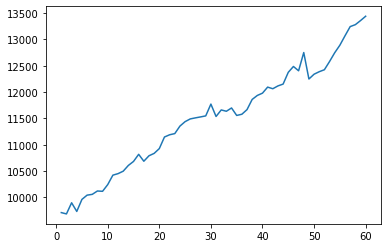

In [3]:
#Q1.d.

plt.plot(nf.time, nf.income)
plt.show()

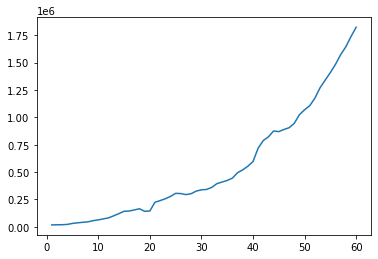

In [4]:
#Q2.c.

plt.plot(nf.time, nf.revenue)
plt.show()

<AxesSubplot:xlabel='quarter'>

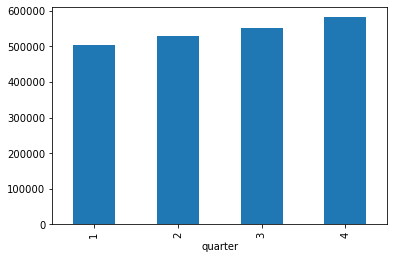

In [5]:
#Q3.a.

nf[["quarter", "revenue"]].groupby("quarter").mean().plot(kind = 'bar',legend = False)

In [6]:
#Q4.b.

reg1 = smf.ols('income ~ time', data = nf).fit()
reg1.params


### Q4

rq4 = smf.ols('income ~ time', data = nf).fit()
summary_col(rq4, stars = True)

# B

,income
Intercept,9743.4443***
,(42.3905)
time,57.6436***
,(1.2086)
R-squared,0.9751
R-squared Adj.,0.9747


In [71]:
#5.a.

reg2 = smf.ols('revenue ~ C(quarter)', data = nf).fit()
summary_col(reg2, stars = True)

,revenue
Intercept,503778.5333***
,(134806.1144)
C(quarter)[T.2],25818.5333
,(190644.6353)
C(quarter)[T.3],47111.0000
,(190644.6353)
C(quarter)[T.4],77523.4000
,(190644.6353)
R-squared,0.0032
R-squared Adj.,-0.0502


In [24]:
#6.c. cubic model

reg2 = smf.ols('revenue ~ time', data = nf).fit()
reg3 = smf.ols('revenue ~ time + I(time ** 2)', data = nf).fit()
reg4 = smf.ols('revenue ~ time + I(time ** 2) + I(time ** 3)', data = nf).fit()
reg5 = smf.ols('revenue ~ time + I(time ** 2) + I(time ** 3) + I(time ** 4)', data = nf).fit()


summary_col([reg2, reg3, reg4, reg5],
            stars = True,
            regressor_order = ['Intercept', 'time'])

,revenue I,revenue II,revenue III,revenue IIII
Intercept,-292738.1621***,101492.8959***,-22562.3246,-5817.7049
,(46751.3263),(21676.5625),(17854.5924),(23161.3998)
time,27348.5223***,-10802.8705***,12638.2170***,7527.4319
,(1332.9442),(1639.6545),(2513.9535),(5168.4765)
I(time ** 2),,625.4327***,-327.3724***,42.4274
,,(26.0534),(95.3387),(340.5538)
I(time ** 3),,,10.4132***,1.0356
,,,(1.0279),(8.3555)
I(time ** 4),,,,0.0769
,,,,(0.0680)


In [27]:
#7. a. linear

reg71 = smf.ols('income ~ time', data = nf).fit()
reg72 = smf.ols('income ~ time + I(time ** 2)', data = nf).fit()
reg73 = smf.ols('income ~ time + I(time ** 2) + I(time ** 3)', data = nf).fit()
reg74 = smf.ols('income ~ time + I(time ** 2) + I(time ** 3) + I(time ** 4)', data = nf).fit()


summary_col([reg71, reg72, reg73, reg74],
            stars = True,
            regressor_order = ['Intercept', 'time'])

,income I,income II,income III,income IIII
Intercept,9743.4443***,9680.6513***,9415.7676***,9621.2833***
,(42.3905),(64.5863),(73.1654),(85.6663)
time,57.6436***,63.7204***,113.7720***,51.0446***
,(1.2086),(4.8854),(10.3018),(19.1165)
I(time ** 2),,-0.0996,-2.1341***,2.4047*
,,(0.0776),(0.3907),(1.2596)
I(time ** 3),,,0.0222***,-0.0929***
,,,(0.0042),(0.0309)
I(time ** 4),,,,0.0009***
,,,,(0.0003)


In [72]:
#8.c.

reg8 = smf.ols('income ~ time', data = nf[nf.year < 2015]).fit()
reg8.predict(nf)[(nf.year == 2015) & (nf.quarter == 4)]


#60*55.881449+9778.347416



59    13131.23436
dtype: float64

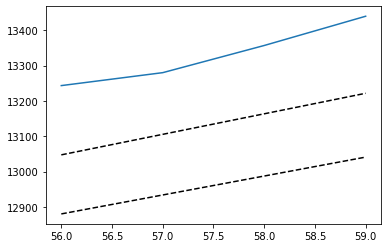

In [77]:
#9.b.

predictionTable = reg8.get_prediction(nf).summary_frame()
nf['ciL'] = predictionTable['mean_ci_lower']
nf['ciU'] = predictionTable['mean_ci_upper']

nf.income[nf.year == 2015].plot()
nf.ciL[nf.year == 2015].plot(color = 'black', linestyle = 'dashed')
nf.ciU[nf.year == 2015].plot(color = 'black', linestyle = 'dashed')
plt.show()



In [83]:
#10.b.

path = '/Users/nicolelubaczewska/Downloads/coffeeFull(1).csv'

cf = pd.read_csv(path)

In [84]:
cf.head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture
0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12
1,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12
2,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00
3,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11
4,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12


In [85]:
# STANDARDIZING/SCALING DATA
CF = pd.DataFrame(scale(cf))
CF.columns = cf.columns
CF.describe()


,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture
count,1.337000e+03,1.337000e+03,1.337000e+03,1.337000e+03,1.337000e+03,1.337000e+03,1.337000e+03,1.337000e+03,1.337000e+03,1.337000e+03,1.337000e+03,1.337000e+03
mean,4.314674e-15,-1.327784e-14,-7.393737e-16,-6.465700e-15,8.913339e-16,-2.172616e-15,-2.298170e-15,4.680541e-15,-3.535442e-15,6.294724e-15,7.094798e-16,-2.168132e-16
std,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00,1.000374e+00
min,-4.552245e+00,-4.236047e+00,-3.531142e+00,-7.179653e+00,-7.939183e+00,-6.434202e+00,-7.919208e+00,-1.376007e+01,-1.539885e+01,-5.482401e+00,-8.307491e+00,-1.829199e+00
25%,-4.999723e-01,-5.738737e-01,-4.464211e-01,-6.617597e-01,-6.268672e-01,-5.468868e-01,3.254385e-01,2.204149e-01,2.454795e-01,-6.061475e-01,-3.986085e-01,3.438170e-02
50%,1.871865e-02,1.585609e-01,3.913688e-02,1.216410e-01,-7.438107e-02,-6.571194e-02,3.254385e-01,2.204149e-01,2.454795e-01,-2.005938e-02,1.298909e-01,4.485108e-01
75%,5.698277e-01,6.566164e-01,4.961326e-01,6.543534e-01,4.781050e-01,6.418981e-01,3.254385e-01,2.204149e-01,2.454795e-01,5.660288e-01,5.653447e-01,6.555754e-01
max,3.811646e+00,3.820734e+00,3.609416e+00,3.787956e+00,3.435531e+00,3.472338e+00,3.254385e-01,2.204149e-01,2.454795e-01,5.840822e+00,3.137127e+00,3.968609e+00


In [86]:
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(CF)

In [89]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = CF.columns
centroids.iloc[0].sort_values()



Flavor             -1.087803
Aftertaste         -1.072090
Balance            -1.057086
Cupper.Points      -0.993861
Acidity            -0.979222
Aroma              -0.975400
Body               -0.955404
Total.Cup.Points   -0.848489
Uniformity         -0.014916
Clean.Cup           0.128601
Sweetness           0.158933
Moisture            0.279094
Name: 0, dtype: float64

In [91]:
#11a.

centroids['Moisture']

0    0.279094
1    0.064684
2   -0.351511
3    0.084231
Name: Moisture, dtype: float64

In [93]:
#12.b

centroids.iloc[[0,1]][['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Moisture']]


,Aroma,Flavor,Aftertaste,Acidity,Moisture
0,-0.9754,-1.087803,-1.072090,-0.979222,0.279094
1,0.0033,0.046865,0.030821,-0.054911,0.064684


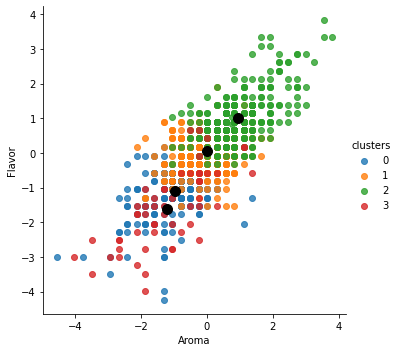

In [95]:
#13.a.

import seaborn as sb

cf = CF
cf['clusters'] = kmeans.labels_
sb.lmplot(x = 'Aroma', y = 'Flavor', hue = 'clusters', data = cf, fit_reg = False)
plt.scatter(centroids.Aroma, centroids.Flavor, color = 'black', s = 100)
plt.show()

In [66]:
#14.b

In [67]:
#15.b